In [38]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
img = cv2.imread('./test-images/28003-1510231943.jpg')
img.shape

(2881, 2218, 3)

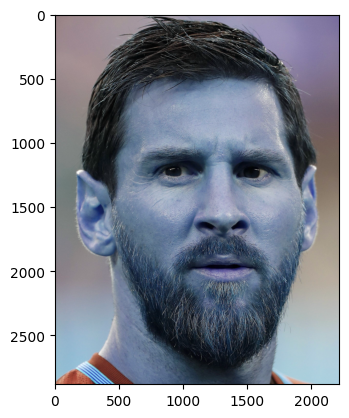

In [40]:
plt.imshow(img)

In [41]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(2881, 2218)

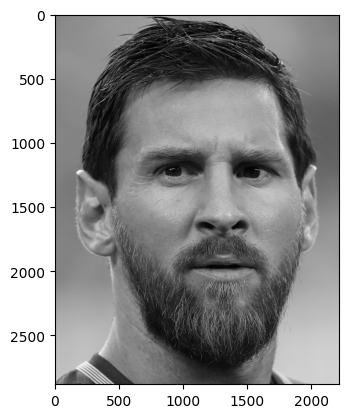

In [42]:
plt.imshow(gray,cmap='gray')

In [43]:
face_cascade = cv2.CascadeClassifier('.\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('.\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 384,  562, 1684, 1684]])

In [44]:
(x,y,w,h) = faces[0]
x,y,w,h

(384, 562, 1684, 1684)

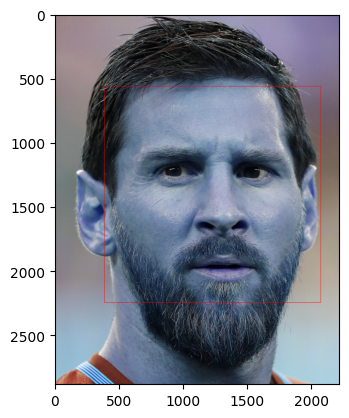

In [45]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

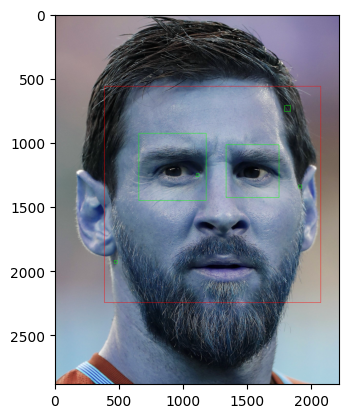

In [46]:
cv2.destroyAllWindows
for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap = 'gray')
plt.show()
        

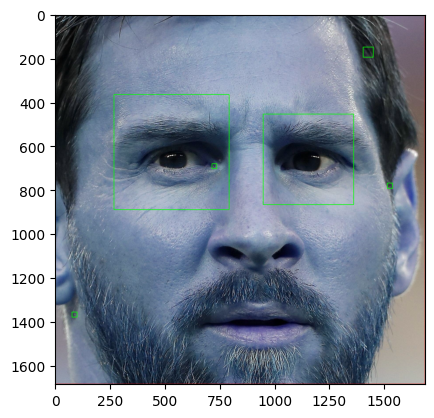

In [47]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [48]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

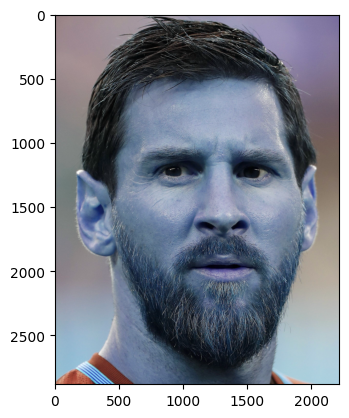

In [49]:
original_img = cv2.imread('./test-images/28003-1510231943.jpg')
plt.imshow(original_img)

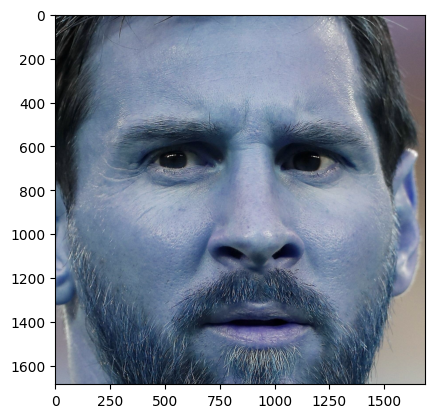

In [50]:
cropped_image = get_cropped_image_if_2_eyes('./test-images/28003-1510231943.jpg')
plt.imshow(cropped_image)

In [51]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test-images/28003-1510231943.jpg')
cropped_image_no_2_eyes

array([[[ 79,  87,  87],
        [ 82,  92,  92],
        [ 83,  93,  93],
        ...,
        [124, 109, 136],
        [124, 109, 136],
        [124, 109, 136]],

       [[ 78,  88,  88],
        [ 79,  89,  89],
        [ 81,  91,  91],
        ...,
        [122, 107, 134],
        [122, 107, 134],
        [123, 108, 135]],

       [[ 76,  86,  86],
        [ 71,  83,  83],
        [ 70,  80,  80],
        ...,
        [121, 107, 131],
        [122, 108, 132],
        [122, 108, 132]],

       ...,

       [[150, 158, 175],
        [150, 158, 175],
        [150, 158, 175],
        ...,
        [186, 183, 179],
        [186, 183, 179],
        [186, 183, 179]],

       [[149, 156, 175],
        [149, 156, 175],
        [149, 156, 175],
        ...,
        [185, 184, 180],
        [184, 183, 179],
        [184, 183, 179]],

       [[146, 153, 172],
        [146, 153, 172],
        [147, 154, 173],
        ...,
        [185, 184, 180],
        [184, 183, 179],
        [184, 183, 179]]

In [52]:
path_to_data = "./FacesDataset/"
path_to_cr_data = "./FacesDataset/cropped/"

In [53]:
import os
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [54]:
img_dirs

['./FacesDataset/Jennifer_Lawrence',
 './FacesDataset/Leonardo_DiCaprio',
 './FacesDataset/lionel_messi',
 './FacesDataset/Megan_Fox',
 './FacesDataset/Scarlett_Johansson',
 './FacesDataset/serena_williams',
 './FacesDataset/Tom_Cruise',
 './FacesDataset/Tom_Hanks',
 './FacesDataset/virat_kohli',
 './FacesDataset/Will_Smith']

In [55]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [56]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./FacesDataset/cropped/Jennifer_Lawrence
Generating cropped images in folder:  ./FacesDataset/cropped/Leonardo_DiCaprio
Generating cropped images in folder:  ./FacesDataset/cropped/lionel_messi
Generating cropped images in folder:  ./FacesDataset/cropped/Megan_Fox
Generating cropped images in folder:  ./FacesDataset/cropped/Scarlett_Johansson
Generating cropped images in folder:  ./FacesDataset/cropped/serena_williams
Generating cropped images in folder:  ./FacesDataset/cropped/Tom_Cruise
Generating cropped images in folder:  ./FacesDataset/cropped/Tom_Hanks
Generating cropped images in folder:  ./FacesDataset/cropped/virat_kohli
Generating cropped images in folder:  ./FacesDataset/cropped/Will_Smith


In [57]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [58]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Jennifer_Lawrence': 0,
 'Leonardo_DiCaprio': 1,
 'lionel_messi': 2,
 'Megan_Fox': 3,
 'Scarlett_Johansson': 4,
 'serena_williams': 5,
 'Tom_Cruise': 6,
 'Tom_Hanks': 7,
 'virat_kohli': 8,
 'Will_Smith': 9}

In [59]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [60]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(727, 4096)

In [61]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc',SVC(kernel = 'linear',C=200))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7912087912087912

In [63]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.68      0.87      0.76        15
           2       0.88      0.78      0.82         9
           3       0.83      0.80      0.82        25
           4       0.88      0.85      0.86        41
           5       0.80      0.57      0.67        14
           6       0.73      0.79      0.76        14
           7       0.81      0.87      0.84        15
           8       1.00      0.88      0.93         8
           9       0.69      0.73      0.71        15

    accuracy                           0.79       182
   macro avg       0.80      0.79      0.79       182
weighted avg       0.80      0.79      0.79       182



In [64]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [65]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [66]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.755963,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.502752,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.743119,{'logisticregression__C': 1}


In [67]:
best_estimators['svm'].score(X_test,y_test)

0.7912087912087912

In [68]:
best_estimators['random_forest'].score(X_test,y_test)

0.47802197802197804

In [69]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7582417582417582

In [70]:
best_clf = best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[19,  1,  0,  2,  3,  0,  1,  0,  0,  0],
       [ 0, 13,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  7,  0,  0,  0,  1,  0,  0,  1],
       [ 3,  0,  0, 20,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  2, 35,  0,  2,  0,  0,  2],
       [ 1,  2,  0,  0,  1,  8,  0,  1,  0,  1],
       [ 1,  1,  0,  0,  0,  0, 11,  1,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0, 13,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  7,  0],
       [ 1,  1,  1,  0,  0,  0,  0,  1,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

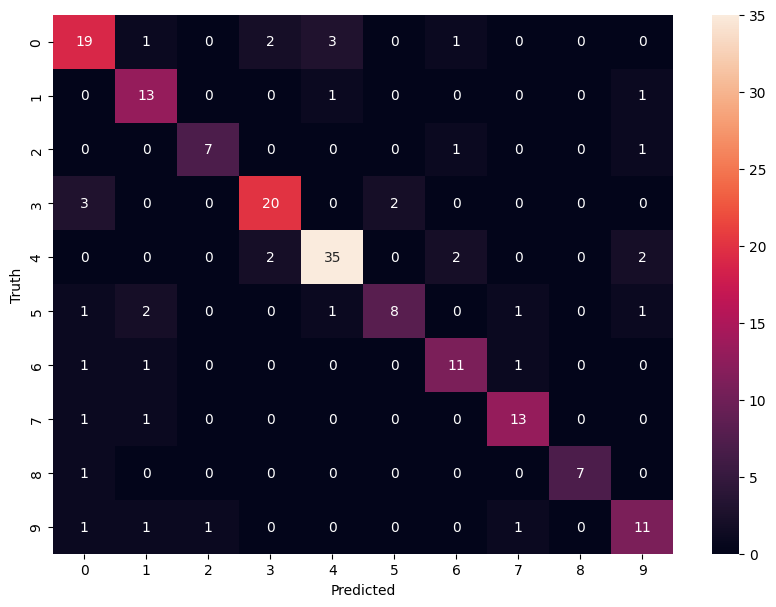

In [71]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
class_dict

{'Jennifer_Lawrence': 0,
 'Leonardo_DiCaprio': 1,
 'lionel_messi': 2,
 'Megan_Fox': 3,
 'Scarlett_Johansson': 4,
 'serena_williams': 5,
 'Tom_Cruise': 6,
 'Tom_Hanks': 7,
 'virat_kohli': 8,
 'Will_Smith': 9}

In [73]:
# !pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [74]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))